In [1]:
from matplotlib import pyplot as plt

from planetary_coverage import  SpiceRef
from spice_segmenter.spice_window import SpiceWindow
import numpy as np

In [2]:
from quick_setup import config, traj, start, end

2024-11-08 13:47:10.279 | WARNING  | quick_spice_manager.spice_manager:__attrs_post_init__:61 - Using as default meta-kernel plan


In [3]:
from spice_segmenter.coordinates import Vector

io_juice = Vector("JUICE", "IO", frame=SpiceRef("IO").frame, abcorr="LT+S") # a vector
io_juice

Vector from JUICE to IO in frame IAU_IO

In [4]:
t = traj.ets[100]

io_juice(t) # get the vector value

array([ 3.34476864e+08,  7.07730908e+08, -4.29268382e+07])

In [5]:
io_juice.x(t) # get the x component

array(3.34476864e+08)

In [6]:
io_juice.type

<PropertyTypes.VECTOR: 3>

In [7]:
io_juice.y(t) # get the y component

array(7.07730908e+08)

In [8]:
io_juice.z(t) # get the z component

array(-42926838.20721731)

In [9]:
# get in a different coordinate type

latitudinal = io_juice.as_latitudinal

In [10]:
latitudinal(t)


array([ 7.83964620e+08,  1.12930426e+00, -5.47834901e-02])

In [11]:
latitudinal.latitude(t)

array(-0.05478349)

In [12]:
#create a constraint -> only scalars properties can be used:
latitudinal = io_juice.as_latitudinal
c = (latitudinal.latitude > "-0.1 deg") & (latitudinal.latitude < "0.1 deg") # find when juice is in the equatorial plane of IO
c

((latitude > -0.1 degree) & (latitude < 0.1 degree))

In [13]:

shift = np.timedelta64(1, "h")
w = SpiceWindow()
w.add_interval(start+shift, end-shift)

In [14]:
result = c.solve(w)

/home/luca/data/Code/spice_segmenter.git/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Coordinate pass 1 of 2: 100%|██████████| 100.0/100 [00:06<00:00, 14.93%/s]             
Coordinate pass 2 of 2: 100%|██████████| 100.0/100 [00:00<00:00, 437.59%/s]   
Coordinate pass 1 of 2: 100%|██████████| 100.0/100 [00:03<00:00, 25.81%/s]              
Coordinate pass 2 of 2: 100%|██████████| 100.0/100 [00:00<00:00, 818.87%/s] 


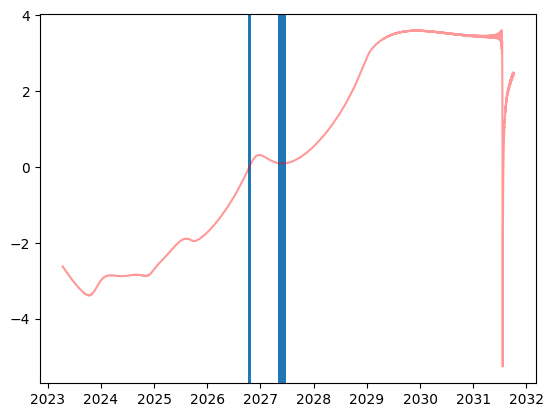

In [15]:

latitude_deg = latitudinal.latitude.as_unit("deg")

values = latitude_deg(traj.ets)
result.plot()

plt.plot(traj.utc, values, label="latitude", alpha=0.4, color="red")

In [16]:
result.to_datetimerange() # the intervals

[2026-10-05T01:14:11 - 2026-10-29T04:57:07,
 2027-05-04T19:18:14 - 2027-06-25T13:07:43,
 2031-07-21T05:46:33 - 2031-07-21T07:04:09,
 2031-07-26T20:17:04 - 2031-07-27T13:54:07]